In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import sklearn as sk

In [0]:
df = pd.read_csv("Bond_Uni_Taiwan_Bank.csv")

In [45]:
df.head()

,ROWNUMBER,CREDITAMOUNT,SEX,EDUCATION,MARRIAGE,AGE,PAYDELAY1,PAYDELAY2,PAYDELAY3,PAYDELAY4,PAYDELAY5,PAYDELAY6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTNEXTMONTH
0,203,140000.0,Female,Graduate School,Single,26,-1,0,-1,-1,-1,-1,13424.0,18000.0,13001.0,5818.0,13506.0,487.0,10000.0,13001.0,5841.0,13506.0,487.0,7004.0,0
1,204,120000.0,Male,University,Single,26,0,0,0,0,0,0,107314.0,110578.0,113736.0,116000.0,119131.0,122135.0,5000.0,5000.0,4152.0,5000.0,5000.0,5000.0,0
2,205,360000.0,Female,University,Married,48,0,0,0,0,0,0,226430.0,231878.0,234192.0,190211.0,173557.0,146511.0,9100.0,7300.0,5800.0,5600.0,5600.0,4100.0,0
3,206,20000.0,Male,High School,Married,43,-1,-1,0,0,0,0,227.0,20351.0,20237.0,19339.0,19450.0,19337.0,22359.0,1305.0,1258.0,1459.0,3457.0,1700.0,0
4,207,100000.0,Male,Graduate School,Married,47,-1,-1,-1,-1,-1,-1,390.0,1473.0,390.0,390.0,390.0,0.0,1473.0,390.0,390.0,390.0,0.0,2380.0,0


In [0]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [47]:
percent_missing = df.isnull().sum() / len(df)
percent_missing_df = pd.DataFrame({'percent_missing': percent_missing})
percent_missing_df

,percent_missing
ROWNUMBER,0.0
CREDITAMOUNT,0.0
SEX,0.0
EDUCATION,0.0
MARRIAGE,0.0
AGE,0.0
PAYDELAY1,0.0
PAYDELAY2,0.0
PAYDELAY3,0.0
PAYDELAY4,0.0


In [0]:
# so the missing data is none. Good.

In [0]:
# convert column names into lowercase
df.columns = map(str.lower, df.columns)

In [50]:
df.head(2)

,rownumber,creditamount,sex,education,marriage,age,paydelay1,paydelay2,paydelay3,paydelay4,paydelay5,paydelay6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaultnextmonth
0,203,140000.0,Female,Graduate School,Single,26,-1,0,-1,-1,-1,-1,13424.0,18000.0,13001.0,5818.0,13506.0,487.0,10000.0,13001.0,5841.0,13506.0,487.0,7004.0,0
1,204,120000.0,Male,University,Single,26,0,0,0,0,0,0,107314.0,110578.0,113736.0,116000.0,119131.0,122135.0,5000.0,5000.0,4152.0,5000.0,5000.0,5000.0,0


In [0]:
# convert columns into proper type.
new_df = df.astype({"sex":'category', "education":'category', "marriage":'category', "defaultnextmonth":"category"})

# First, EDA -- Education vs Gender

In [0]:
# which city and state has maximum teacher donors 
tempdf = new_df.groupby(['education', 'sex']).agg({'sex' : 'count' }).rename(columns={'sex' : 'gender_counts'}).reset_index()

In [53]:
tempdf

,education,sex,gender_counts
0,0,Female,6
1,0,Male,8
2,5,Female,185
3,5,Male,95
4,6,Female,26
5,6,Male,25
6,Below High School,Female,81
7,Below High School,Male,42
8,Graduate School,Female,6231
9,Graduate School,Male,4354


# deal with education is number problem -- Start

In [54]:
df["education"].unique()

array(['Graduate School', 'University', 'High School', '5',
       'Below High School', '6', '0'], dtype=object)

In [55]:
temp = [df[df['education'] == i].shape[0] for i in ('5','6','0')]
temp

[280, 51, 14]

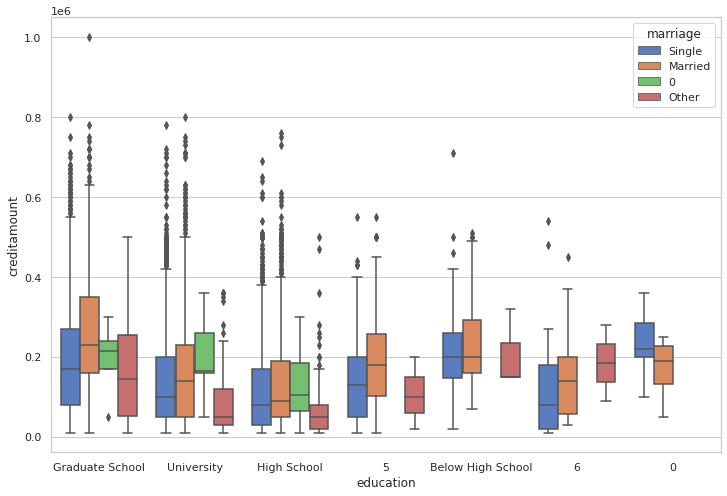

In [56]:
# Now, I wanna to deduce what are ('5','6','0') stands for in education via boxplot -- marriage vs education
sns.set(style = "whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="education", y="creditamount", hue="marriage",
                 data=df, palette="muted")

In [57]:
# OK, so the conclusion is, "0", "5", "6" in education stands for "Below high school", "Graduate school" and "University" respectively.

# change the column value
replace_values = {'0' : "Below High School", '5' : "Graduate School", '6' : "University" }                                                                                          

new_df = new_df.replace({"education": replace_values})                                                                                             

new_df["education"].unique()

array(['Graduate School', 'University', 'High School',
       'Below High School'], dtype=object)

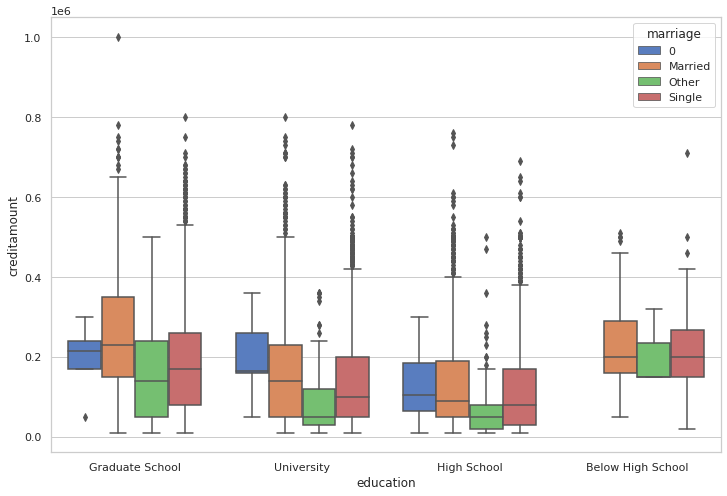

In [58]:
sns.set(style = "whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="education", y="creditamount", hue="marriage",
                 data=new_df, palette="muted")

In [59]:
new_df.head(2)

,rownumber,creditamount,sex,education,marriage,age,paydelay1,paydelay2,paydelay3,paydelay4,paydelay5,paydelay6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaultnextmonth
0,203,140000.0,Female,Graduate School,Single,26,-1,0,-1,-1,-1,-1,13424.0,18000.0,13001.0,5818.0,13506.0,487.0,10000.0,13001.0,5841.0,13506.0,487.0,7004.0,0
1,204,120000.0,Male,University,Single,26,0,0,0,0,0,0,107314.0,110578.0,113736.0,116000.0,119131.0,122135.0,5000.0,5000.0,4152.0,5000.0,5000.0,5000.0,0


# deal with education contains number problem -- End

# Now check out the education diffierence between genders

In [0]:
tempdf = new_df.groupby(['education', 'sex']).agg({'sex' : 'count' }).rename(columns={'sex' : 'sex_counts'}).reset_index()

In [61]:
tempdf

,education,sex,sex_counts
0,Below High School,Female,87
1,Below High School,Male,50
2,Graduate School,Female,6416
3,Graduate School,Male,4449
4,High School,Female,2927
5,High School,Male,1990
6,University,Female,8682
7,University,Male,5399


In [62]:
male_df = tempdf[tempdf['sex']=='Male']
male_x = male_df['education']
male_y = male_df['sex_counts']
female_df = tempdf[tempdf['sex']=='Female']
female_x = female_df['education']
female_y = female_df['sex_counts']

trace1 = go.Bar(
    x=male_x,
    y=male_y,
    name='Male',
    marker=dict(color='#f259d6'),
    opacity=0.8
)
trace2 = go.Bar(
    x=female_x,
    y=female_y,
    name='Female',
    marker=dict(color='#f7bb31'),
    opacity=0.8
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    legend=dict(dict(x=-.1, y=1.2)),
    margin=dict(b=120),
    title = 'States and the distribution of gender vs education',
)

fig = go.Figure(data=data, layout=layout)

# show
fig

# Second Part -- feature selection

1. Heatplot

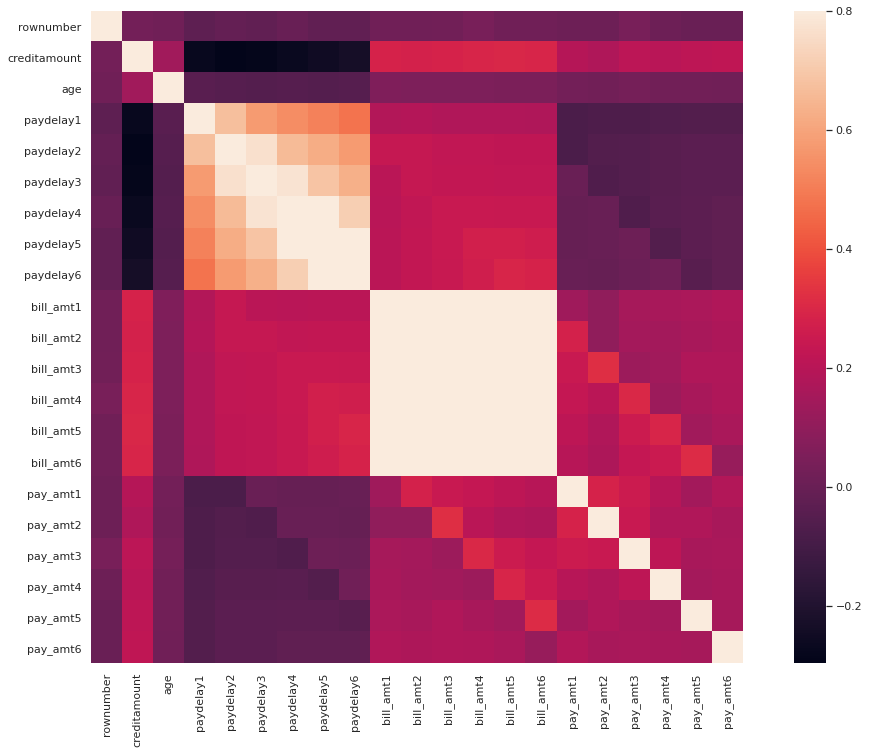

In [63]:
#correlation matrix
corrmat = new_df.corr()
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corrmat, vmax=.8, square=True) # with the correlation value show:  annot = True

In [0]:
# OK, so we see a pool of white area which stands for high correlation. they need to be discarded. 

# discard column bill_amt1, bill_amt2, bill_amt3, bill_amt4, bill_amt5, bill_amt6.
new_df = new_df.drop(["bill_amt1", "bill_amt2", "bill_amt3", "bill_amt4", "bill_amt5", "bill_amt6"], axis = 1)

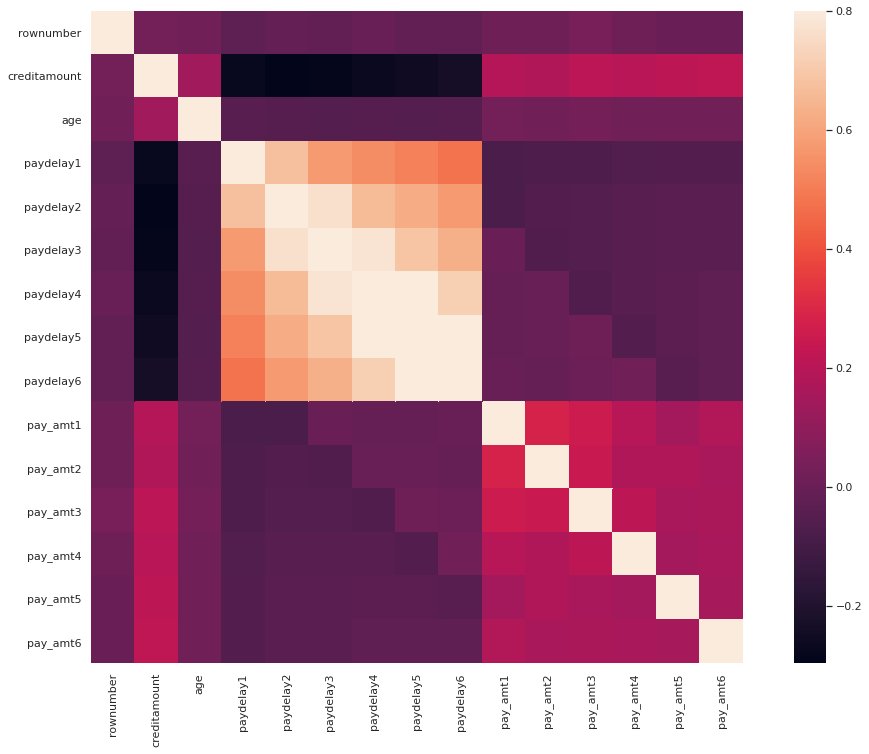

In [65]:
#correlation matrix
corrmat = new_df.corr()
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corrmat, vmax=.8, square=True) # with the correlation value show:  annot = True

In [66]:
new_df.head(2)

,rownumber,creditamount,sex,education,marriage,age,paydelay1,paydelay2,paydelay3,paydelay4,paydelay5,paydelay6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaultnextmonth
0,203,140000.0,Female,Graduate School,Single,26,-1,0,-1,-1,-1,-1,10000.0,13001.0,5841.0,13506.0,487.0,7004.0,0
1,204,120000.0,Male,University,Single,26,0,0,0,0,0,0,5000.0,5000.0,4152.0,5000.0,5000.0,5000.0,0


In [0]:
# paydelay 2 - 5 looks suspecious. using another way to test.

# subset(), stepwise, PCA, ElasticNet, Lasso, Rridge

In [0]:
df.columns = map(str.lower, df.columns)

In [0]:
new_df = df

In [0]:
new_df_cat = new_df.astype({"sex":'category', "education":'category', "marriage":'category', "defaultnextmonth":"int"})

In [0]:
replace_values = {'0' : "Below High School", '5' : "Graduate School", '6' : "University" }                                                                                          

new_df_cat = new_df_cat.replace({"education": replace_values})                                                                                             

new_df_cat["education"].unique()

new_df_short = new_df_cat.drop(["bill_amt1", "bill_amt2", "bill_amt3", "bill_amt4", "bill_amt5", "bill_amt6"], axis = 1)

In [72]:
# Here, convert categorical data via one-hot encoding. 
temp = new_df_short.loc[:,["sex", "education", "marriage"]]
temp.head(2)

,sex,education,marriage
0,Female,Graduate School,Single
1,Male,University,Single


In [0]:
temp = pd.get_dummies(temp)

In [74]:
temp

,sex_Female,sex_Male,education_Below High School,education_Graduate School,education_High School,education_University,marriage_0,marriage_Married,marriage_Other,marriage_Single
0,1,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,1
2,1,0,0,0,0,1,0,1,0,0
3,0,1,0,0,1,0,0,1,0,0
4,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
29995,0,1,0,1,0,0,0,0,0,1
29996,0,1,0,1,0,0,0,1,0,0
29997,0,1,0,1,0,0,0,1,0,0
29998,0,1,0,0,0,1,0,1,0,0


In [0]:
merge_df = pd.merge(new_df_short, temp, left_index=True, right_index = True)

In [76]:
merge_df.head(2)

,rownumber,creditamount,sex,education,marriage,age,paydelay1,paydelay2,paydelay3,paydelay4,paydelay5,paydelay6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaultnextmonth,sex_Female,sex_Male,education_Below High School,education_Graduate School,education_High School,education_University,marriage_0,marriage_Married,marriage_Other,marriage_Single
0,203,140000.0,Female,Graduate School,Single,26,-1,0,-1,-1,-1,-1,10000.0,13001.0,5841.0,13506.0,487.0,7004.0,0,1,0,0,1,0,0,0,0,0,1
1,204,120000.0,Male,University,Single,26,0,0,0,0,0,0,5000.0,5000.0,4152.0,5000.0,5000.0,5000.0,0,0,1,0,0,0,1,0,0,0,1


In [77]:
model_df = merge_df.drop(["sex", "education", "marriage"], axis = 1) # dataframe for model is ready.
model_df = model_df.drop(columns = "rownumber", axis = 1)
model_df.head(2)

,creditamount,age,paydelay1,paydelay2,paydelay3,paydelay4,paydelay5,paydelay6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaultnextmonth,sex_Female,sex_Male,education_Below High School,education_Graduate School,education_High School,education_University,marriage_0,marriage_Married,marriage_Other,marriage_Single
0,140000.0,26,-1,0,-1,-1,-1,-1,10000.0,13001.0,5841.0,13506.0,487.0,7004.0,0,1,0,0,1,0,0,0,0,0,1
1,120000.0,26,0,0,0,0,0,0,5000.0,5000.0,4152.0,5000.0,5000.0,5000.0,0,0,1,0,0,0,1,0,0,0,1


RF for feature selection

In [38]:
'''
model_df = model_df.astype({"sex_Female":'category', 
                            "sex_Male":'category', 
                            "education_Below High School":'category', 
                            "education_Graduate School":"category",
                            "education_High School": "category",
                            "education_University": "category",
                            "marriage_0":"category",
                            "marriage_Married": "category",
                            "marriage_Other": "category",
                            "marriage_Single": "category"})
'''

'\nmodel_df = model_df.astype({"sex_Female":\'category\', \n                            "sex_Male":\'category\', \n                            "education_Below High School":\'category\', \n                            "education_Graduate School":"category",\n                            "education_High School": "category",\n                            "education_University": "category",\n                            "marriage_0":"category",\n                            "marriage_Married": "category",\n                            "marriage_Other": "category",\n                            "marriage_Single": "category"})\n'

In [0]:
model_df = model_df.astype({"sex_Female":'int', 
                            "sex_Male":'int', 
                            "education_Below High School":'int', 
                            "education_Graduate School":"int",
                            "education_High School": "int",
                            "education_University": "int",
                            "marriage_0":"int",
                            "marriage_Married": "int",
                            "marriage_Other": "int",
                            "marriage_Single": "int"})

In [0]:
X = model_df.drop(columns = "defaultnextmonth", axis = 1)
y = model_df.defaultnextmonth

OK, Best subset() for feature selection -- Started

In [0]:
import time
import statsmodels.api as sm
import itertools

In [0]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [0]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [0]:
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,26):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 24 models on 1 predictors in 0.21608996391296387 seconds.
Processed 276 models on 2 predictors in 3.3208234310150146 seconds.
Processed 2024 models on 3 predictors in 30.181766986846924 seconds.


ok, so here is the problem: the dataset subset() and stepwise feature selection will test too many models, the physical storage (RAM) is stuffed even only for 4 features to predict. 

So, let's try RandomForst to select important features.

Best subset() for feature selection -- Finished

###

Let's try RF for feature importance

In [38]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   creditamount                 30000 non-null  float64
 1   age                          30000 non-null  int64  
 2   paydelay1                    30000 non-null  int64  
 3   paydelay2                    30000 non-null  int64  
 4   paydelay3                    30000 non-null  int64  
 5   paydelay4                    30000 non-null  int64  
 6   paydelay5                    30000 non-null  int64  
 7   paydelay6                    30000 non-null  int64  
 8   pay_amt1                     30000 non-null  float64
 9   pay_amt2                     30000 non-null  float64
 10  pay_amt3                     30000 non-null  float64
 11  pay_amt4                     30000 non-null  float64
 12  pay_amt5                     30000 non-null  float64
 13  pay_amt6        

Code Below is using RF fit the dataset and pull out one tree to visulise.
-- !!! Put it away

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, verbose = 1)

# fit the model
model = rf.fit(X, y)

# Pull out one tree from the forest
estimator = model.estimators_[5]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = y,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Code Below shows feature selection via RF. 

In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# split the dataset
# In all feature selection procedures, it is a good practice to select the features by examining only the training set. 
    # This is to avoid overfitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Firstly, specify the RF instance, indicating the number of trees
# Then I use 'selectFromModel' object from sklearn to automatically select the features.
# SelectFromModel will select those features which importance is greater than the mean importance of all the features by default, 
    #but we can alter this threshold if we want.
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

# To see which features are important we can use get_support method on the fitted model.
sel.get_support()  # return an array of boolean values. 
                   # "True" for the features whose importance is greater than the mean importance and "False" for the rest

# make a list and count the selected features
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat) # return an Integer representing the number of features selected by the random forest

# To get the name of the features selected
print(selected_feat) # return the name of the selected features

Index(['creditamount', 'age', 'paydelay1', 'paydelay2', 'pay_amt1', 'pay_amt2',
       'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object')


In [81]:
# define feat_labels
feat_lables = X_train.columns

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [82]:
 clf.feature_importances_

array([0.0891583 , 0.09783982, 0.10378667, 0.05160557, 0.03462819,
       0.02918189, 0.02734793, 0.02657986, 0.08213024, 0.07773545,
       0.07547653, 0.0729046 , 0.07281992, 0.0728862 , 0.01161011,
       0.01162328, 0.00043733, 0.01188697, 0.01055365, 0.01349545,
       0.00038545, 0.01192762, 0.00226229, 0.01173668])

In [83]:
feat_lables

Index(['creditamount', 'age', 'paydelay1', 'paydelay2', 'paydelay3',
       'paydelay4', 'paydelay5', 'paydelay6', 'pay_amt1', 'pay_amt2',
       'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'sex_Female',
       'sex_Male', 'education_Below High School', 'education_Graduate School',
       'education_High School', 'education_University', 'marriage_0',
       'marriage_Married', 'marriage_Other', 'marriage_Single'],
      dtype='object')

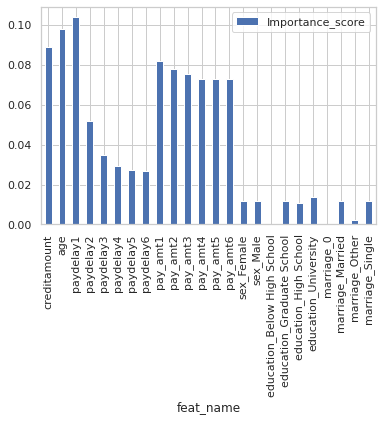

In [68]:
# check and plot the distribution of importance
temp_df = pd.DataFrame(feat_lables,clf.feature_importances_,).reset_index()
temp_df = temp_df.rename(columns = {'index': 'Importance_score', 0: 'feat_name'})
temp_df.plot.bar(x = 'feat_name')

# ok, now use the best feature chose to fit a RF model

In [0]:
# split the dataset
# In all feature selection procedures, it is a good practice to select the features by examining only the training set. 
    # This is to avoid overfitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [82]:
# fit model with all features
clf_allF = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf_allF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# get the data only with chosen features
model_df_sel_ft = model_df[selected_feat]

In [0]:
# define new X and y
X_short = model_df_sel_ft
y_short = model_df.defaultnextmonth

# again, split train, test with new dataset
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X_short,y_short,test_size=0.3, random_state=42)

In [122]:
# fit model with only chosen features
clf_short = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf_short.fit(X_train_s, y_train_s)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [84]:
# move on to the test part -- all feature model
# Use the forest's predict method on the test data
predictions = clf_allF.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.19 degrees.


In [124]:
# move on to the test part -- short model
# Use the forest's predict method on the test data
predictions_short = clf_short.predict(X_test_s)
# Calculate the absolute errors
errors_short = abs(predictions_short - y_test_s)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_short), 2), 'degrees.')

Mean Absolute Error: 0.19 degrees.


In [92]:
# pd.crosstab()
pd.crosstab(y_test, predictions, rownames=['Actual Values'], colnames=['Predicted Values'])

Predicted Values,0,1
Actual Values,,
0,6564,430
1,1252,754


In [125]:
# Now using pandas.crosstable()
pd.crosstab(y_test_s, predictions_short, rownames=['Actual Values'], colnames=['Predicted Values'])

Predicted Values,0,1
Actual Values,,
0,6560,434
1,1261,745


Based on the result, 745 of '1' predicted correctly, and 1261 '1' predicted incorrectly. It is very bad. like, very very bad. The total ratio of '1' being correctly predictecd is 37.14%.

In [0]:
# OK, now we have to try sth else.

# try on LogsticRegression.

# try AdaBoost

# try XgBoost

# try SVM

# try LDA

# then compare them via ROC curve

# try on LogsticRegression.

In [0]:

from sklearn.linear_model import LogisticRegression

# the new dataset
model_df_sel_ft = model_df[selected_feat]

# define new X and y
X_short = model_df_sel_ft
y_short = model_df.defaultnextmonth

# again, split train, test with new dataset
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X_short,y_short,test_size=0.3, random_state=42)

lgm = LogisticRegression(random_state=0, max_iter=10000).fit(X_train_s, y_train_s)
lgm_pred = lgm.predict(X_test_s)

In [88]:
pd.crosstab(y_test_s, lgm_pred, rownames=['Actual Values'], colnames=['Predicted Values'])

Predicted Values,0,1
Actual Values,,
0,6705,289
1,1518,488


As we see here, the logistic model is rubbish!!!!!

# try XgBoost

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [94]:
# fit model no training data
xgb = XGBClassifier()
xgb.fit(X_train_s, y_train_s)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [100]:
# make predictions for test data
xgb_pred = xgb.predict(X_test_s)
predictions = [round(value) for value in xgb_pred]

# evaluate predictions
accuracy = accuracy_score(y_test_s, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.60%


In [101]:
pd.crosstab(y_test_s, xgb_pred, rownames=['Actual Values'], colnames=['Predicted Values'])

Predicted Values,0,1
Actual Values,,
0,6652,342
1,1314,692


# try SVM

In [0]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm.fit(X_train_s, y_train_s)


In [0]:
#Predict the response for test dataset
y_pred = svm.predict(X_test_s)

In [104]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7435555555555555


In [107]:
pd.crosstab(y_test_s, y_pred, rownames=['Actual Values'], colnames=['Predicted Values'])

Predicted Values,0,1
Actual Values,,
0,6285,709
1,1599,407


# try Adboost

In [110]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

adb = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
adb.fit(X_train_s, y_train_s)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [0]:
adb_pred = adb.predict(X_test_s)

In [113]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_s, adb_pred))

Accuracy: 0.8145555555555556


In [115]:
pd.crosstab(y_test_s, adb_pred, rownames=['Actual Values'], colnames=['Predicted Values'])

Predicted Values,0,1
Actual Values,,
0,6701,293
1,1376,630


# try LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_fit = lda.fit_transform(X_train_s, y_train_s)

In [0]:
lda_pred = lda.predict(X_test_s)

In [118]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_s, lda_pred))

Accuracy: 0.8058888888888889


In [120]:
pd.crosstab(y_test_s, lda_pred, rownames=['Actual Values'], colnames=['Predicted Values'])

Predicted Values,0,1
Actual Values,,
0,6781,213
1,1534,472


# draw ROC Curve

In [0]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_s, predictions_short)

fpr_lg, tpr_lg, _ = roc_curve(y_test_s, lgm_pred)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test_s, xgb_pred)

fpr_svm, tpr_svm, _ = roc_curve(y_test_s, y_pred)

fpr_adb, tpr_adb, _ = roc_curve(y_test_s, adb_pred)

fpr_lda, tpr_lda, _ = roc_curve(y_test_s, lda_pred)

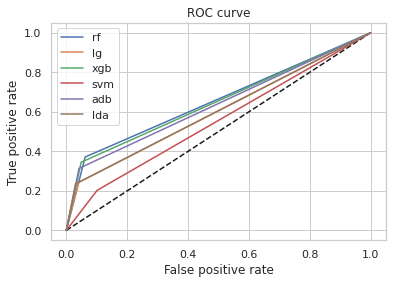

In [127]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='rf')
plt.plot(fpr_lg, tpr_lg, label='lg')
plt.plot(fpr_xgb, tpr_xgb, label='xgb')
plt.plot(fpr_svm, tpr_svm, label='svm')
plt.plot(fpr_adb, tpr_adb, label='adb')
plt.plot(fpr_lda, tpr_lda, label='lda')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()